## Problem statement for Linear Regression
### Boston house prediction
The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

CRIM - per capita crime rate by town <br>
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.<br>
INDUS - proportion of non-retail business acres per town.<br>
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
NOX - nitric oxides concentration (parts per 10 million)<br>
RM - average number of rooms per dwelling<br>
AGE - proportion of owner-occupied units built prior to 1940<br>
DIS - weighted distances to five Boston employment centres<br>
RAD - index of accessibility to radial highways<br>
TAX - full-value property-tax rate per $10,000<br>
PTRATIO - pupil-teacher ratio by town<br>
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<br>
LSTAT - % lower status of the population<br>
MEDV - Median value of owner-occupied homes in $1000's

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Loading a csv file into a pandas dataframe object housing_df using read_csv
# the csv file housing.csv contain the data of the historical prices of houses in boston
housing_df=pd.read_csv("C:\\Users\MEDHA TRUST\\Documents\\Govardhan\\ML\\Datasets\\housing.csv")

housing_df.drop(['index'],inplace=True,axis=1)

In [3]:
housing_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
housing_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
housing_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

<AxesSubplot: xlabel='chas', ylabel='medv'>

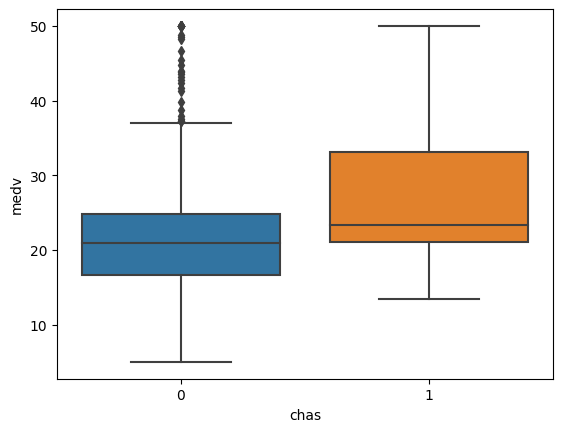

In [6]:
sns.boxplot(housing_df,x='chas',y='medv')

<AxesSubplot: xlabel='rad', ylabel='medv'>

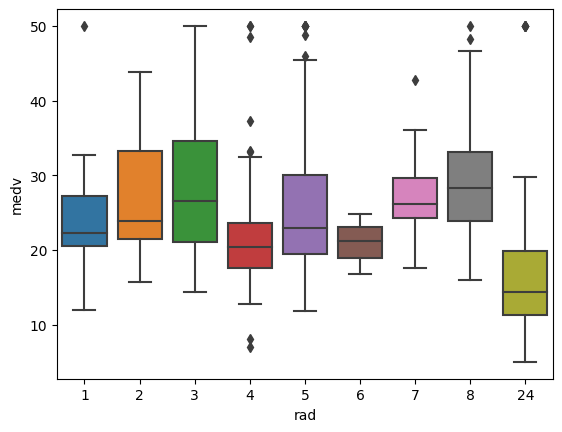

In [7]:
sns.boxplot(housing_df,x='rad',y='medv')

still accessability to radial highways contains some outliers for specific values

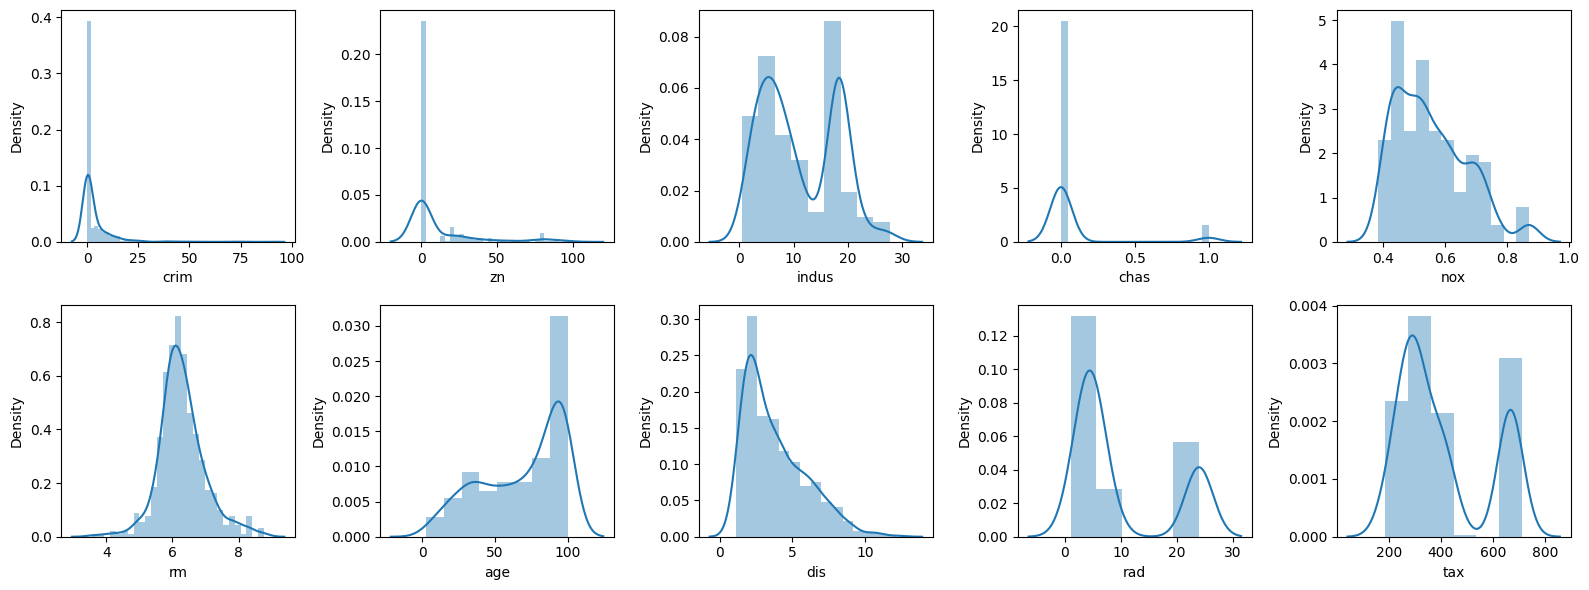

In [8]:
rows = 2
cols = 5
fig, ax = plt.subplots(nrows= rows, ncols= cols, figsize = (16,6))
col = housing_df.columns
index = 0
for i in range(rows):
    for j in range(cols):
        sns.distplot(housing_df[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()
plt.show()

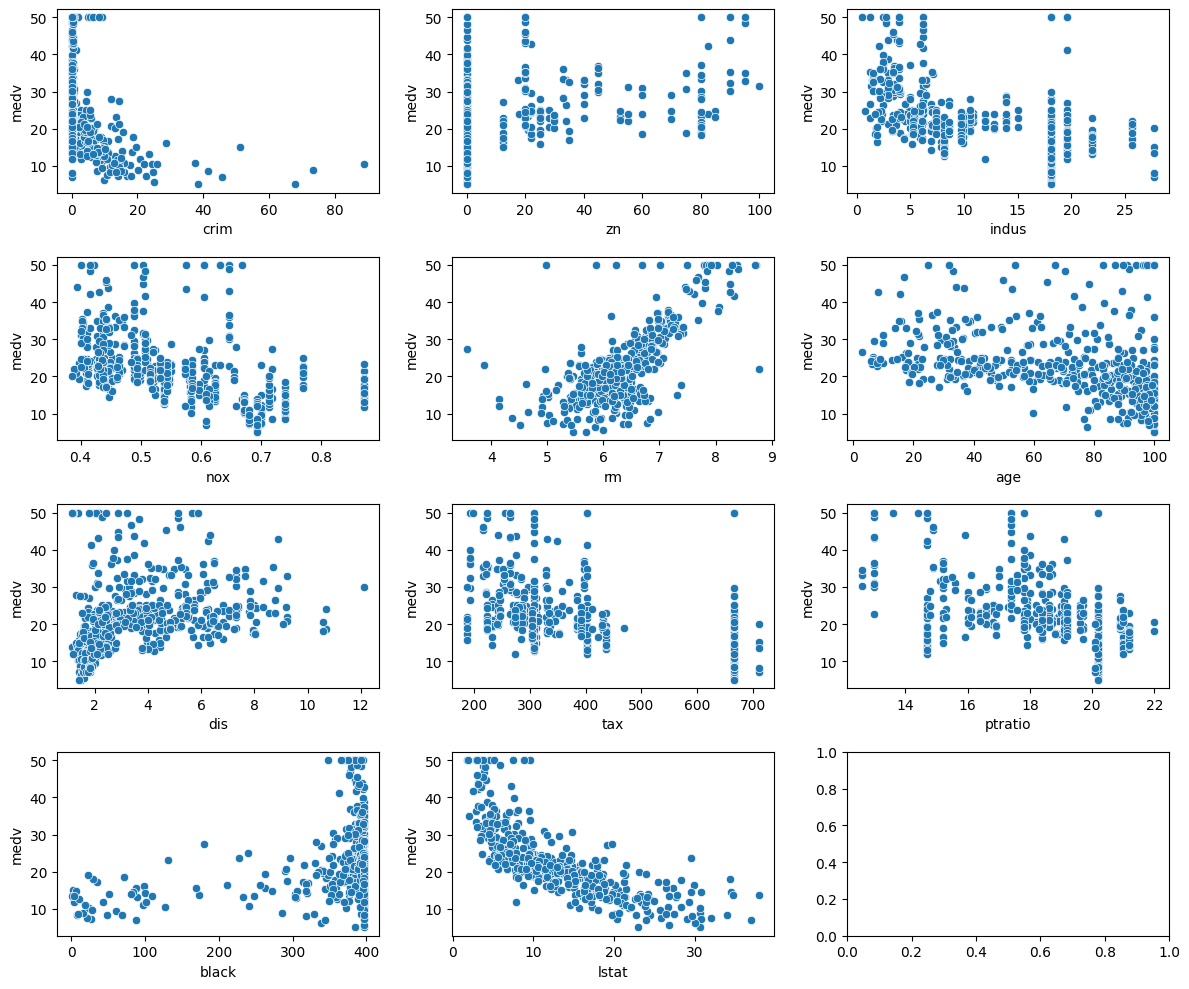

In [9]:
num_vars=['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'tax',
       'ptratio', 'black', 'lstat']

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.scatterplot(data=housing_df, x=var, y='medv', ax=axs[i])

plt.tight_layout()
plt.show()


<AxesSubplot: >

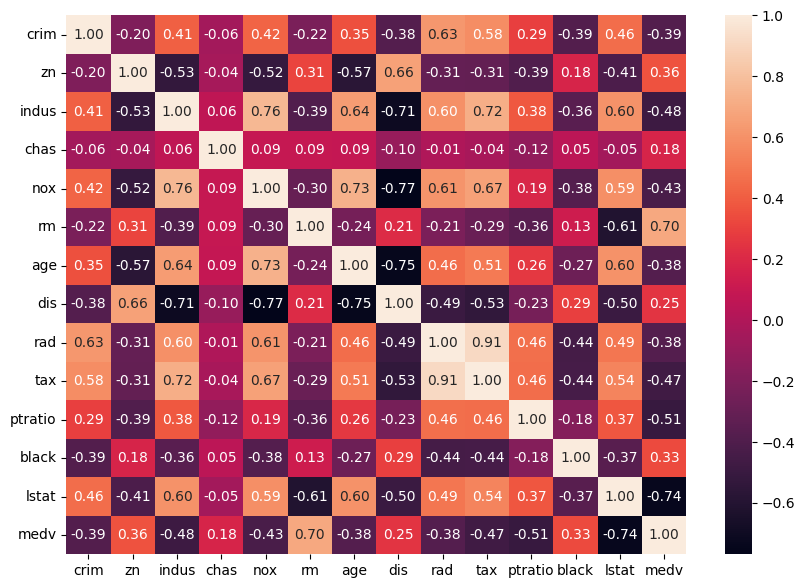

In [10]:
plt.figure(figsize=(10,7))
sns.heatmap(housing_df.corr(),annot=True,fmt='.2f')

As we can observe that their is quite significant correlation either positive or negative among the features hence it may effect the prediction variable

#### Categorical encoding chas, rad features

In [11]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False)  
dummies=encoder.fit_transform(housing_df[['chas','rad']])
dummies=pd.DataFrame(dummies,columns=encoder.get_feature_names_out(['chas','rad']))

#### Standardizing the numerical features

In [12]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_df=scaler.fit_transform(housing_df[num_vars])
scaled_df=pd.DataFrame(scaled_df,columns=scaler.get_feature_names_out(num_vars))

In [13]:
y=housing_df['medv']
X=pd.concat([scaled_df,dummies],axis=1)

In [14]:
#splitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

##### Models

Linear
Test score:  0.6615687658684823 Train score:  0.7628270050876917
Test mse:  24.81844273848121 Train mse:  20.604025365288944


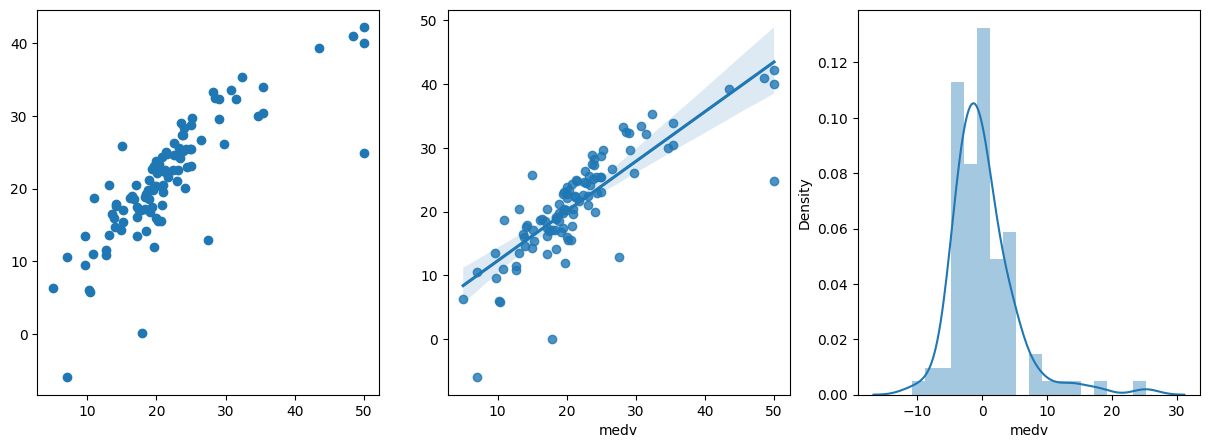

---------------------------------------------------
Ridge
Test score:  0.6603173566112248 Train score:  0.7627518059273234
Test mse:  24.910213313597747 Train mse:  20.610558172315518


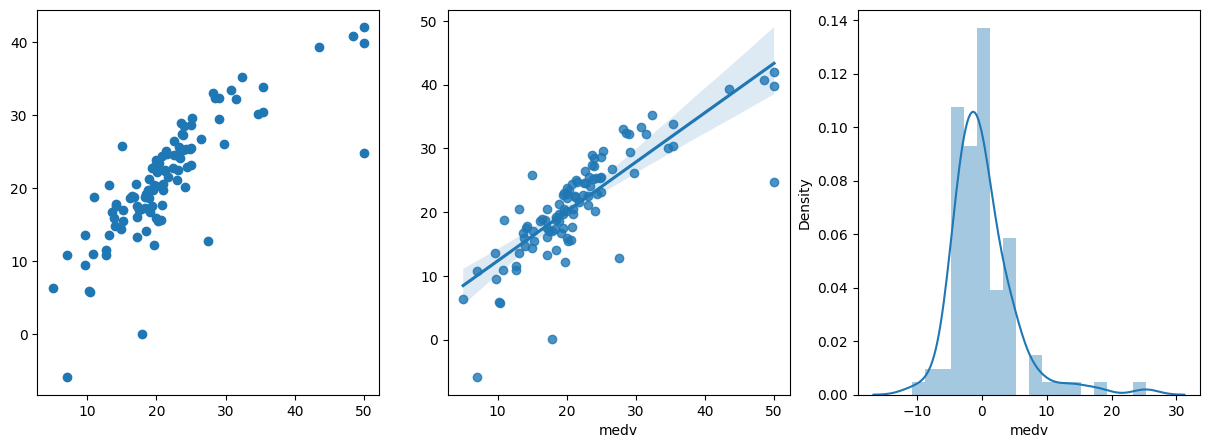

---------------------------------------------------
DecisionTreeRegressor
Test score:  0.6895513695339082 Train score:  1.0
Test mse:  22.766372549019604 Train mse:  0.0


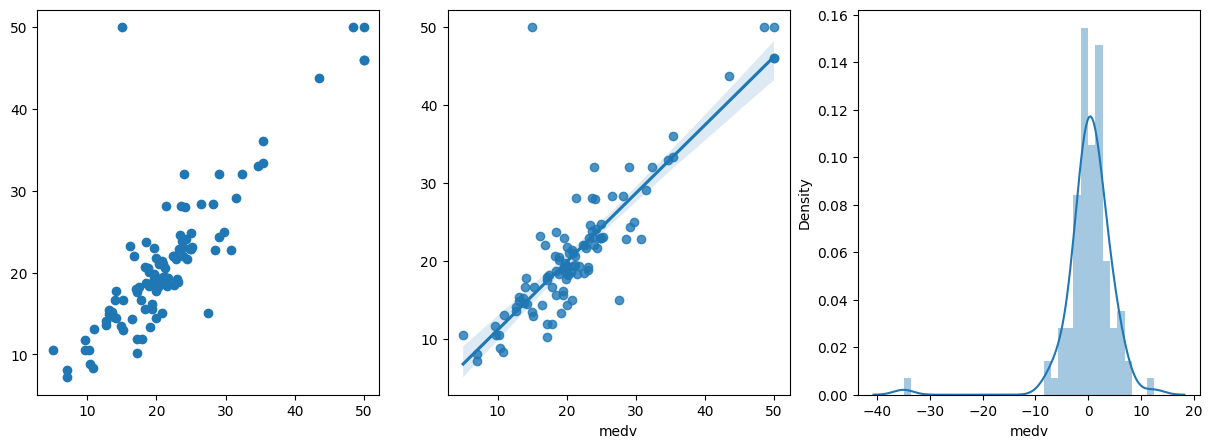

---------------------------------------------------
RandomForestRegressor
Test score:  0.8731241959037999 Train score:  0.9786233397600654
Test mse:  9.304282705882352 Train mse:  1.8570632376237628


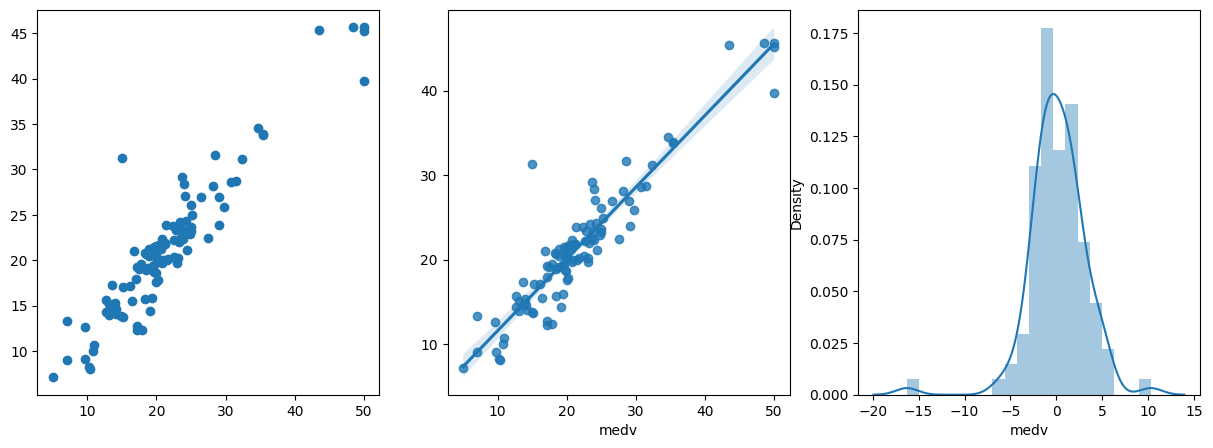

---------------------------------------------------


In [15]:

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

models={'Linear':LinearRegression(),'Ridge':Ridge(),'DecisionTreeRegressor':DecisionTreeRegressor(),'RandomForestRegressor':RandomForestRegressor()}

for key,model in models.items():
    model.fit(X_train,y_train)
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    train_r2=r2_score(y_train,train_pred)
    test_r2=r2_score(y_test,test_pred)

    train_mse=mean_squared_error(y_train,train_pred)
    test_mse=mean_squared_error(y_test,test_pred)

    print(key,end="\n")
    print("Test score: ",test_r2,"Train score: ",train_r2,end="\n")
    print("Test mse: ",test_mse,"Train mse: ",train_mse,end="\n")
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.scatter(y_test,test_pred)
    plt.subplot(1,3,2)
    sns.regplot(x=y_test, y=test_pred)
    plt.subplot(1,3,3)
    sns.distplot(y_test-test_pred)
    plt.show()
    print("---------------------------------------------------")
    

#### We can conclude that the RandomForestRegressor is performing much better with the data set 

Encoding and Standardising the data helped us to achieve a better model performance